# Unsupervised Learning

## Imports

In [5]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# for path
import os
# print(os.listdir('.'))

## Dataset


**Mall Customers Clustering Analysis** https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [6]:
# importing the dataset
data = pd.read_csv('./Mall_Customers.csv')

In [7]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
data.shape

(200, 5)

In [9]:
# describing the data
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
# checking if there is any NULL data

data.isnull().any().any()

False

In [11]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## Data Visualization

### Gender Distribution

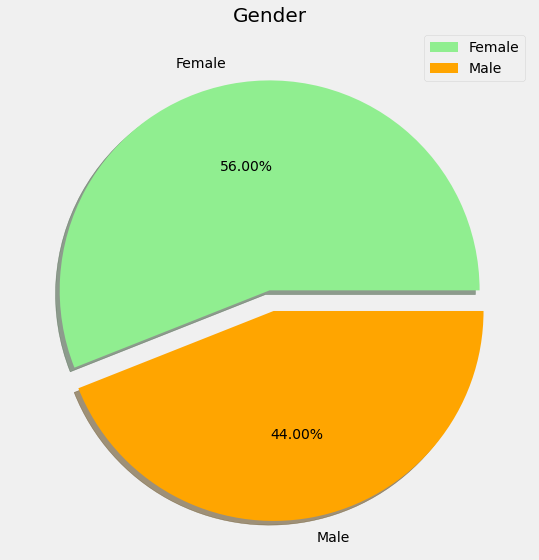

In [12]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

56% vs 44%: it's a significative difference

### Distribution pattern of Annual Income and Age

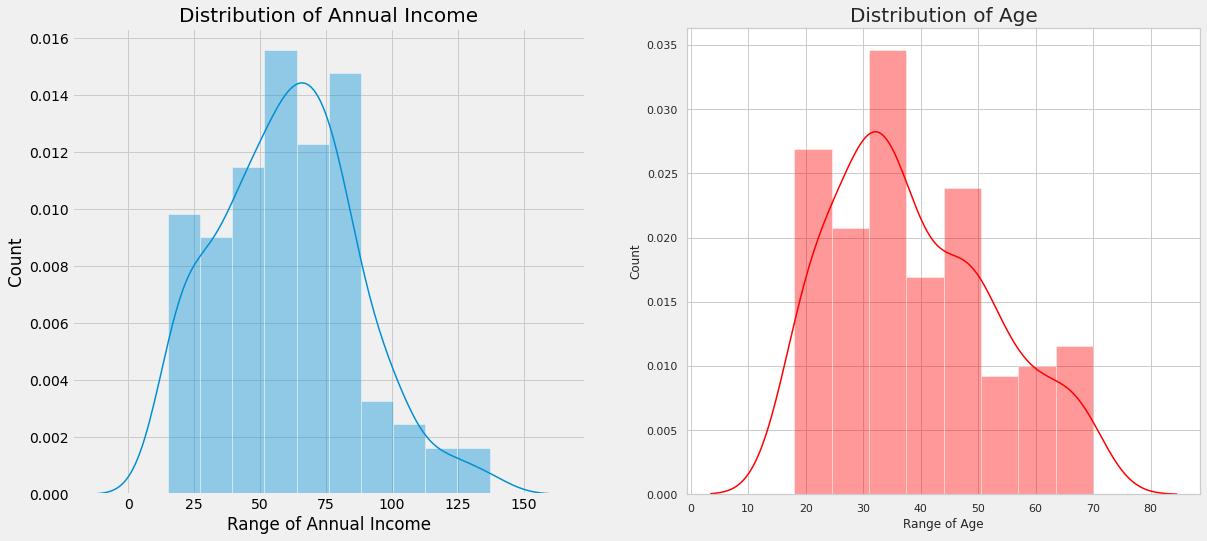

In [13]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

Income:
    
   - There are few people who earn more than 100 US Dollars.
   - Most of the people have an earning of around 50-75 US Dollars.
   - Also, we can say that the least Income is around 20 US Dollars

Customers:

  - The most regular customers for the Mall has age around 30-35 years of age.
  - the senior citizens age group is the least frequent visitor in the Mall.
  - Youngsters are lesser in number as compared to the Middle aged people.

### Countplots

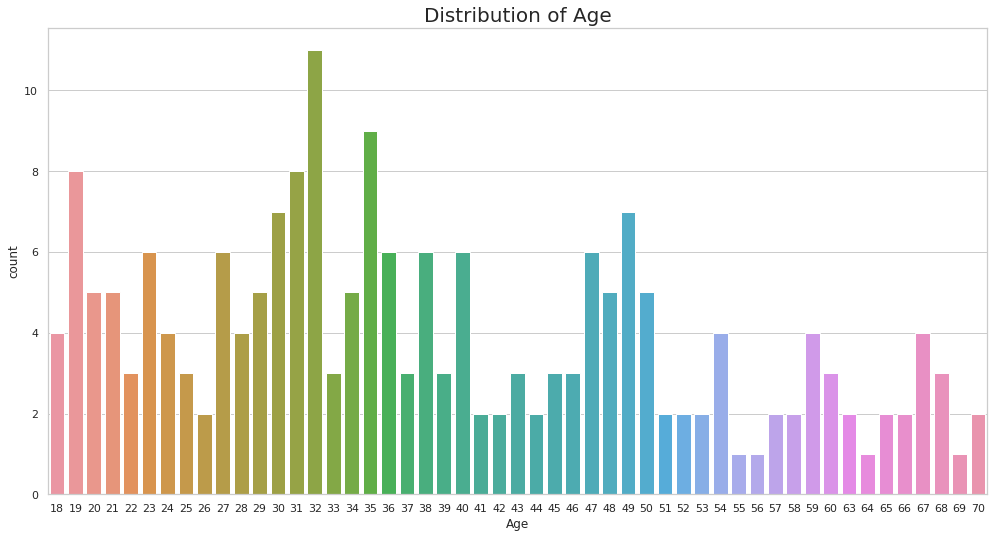

In [14]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.show()

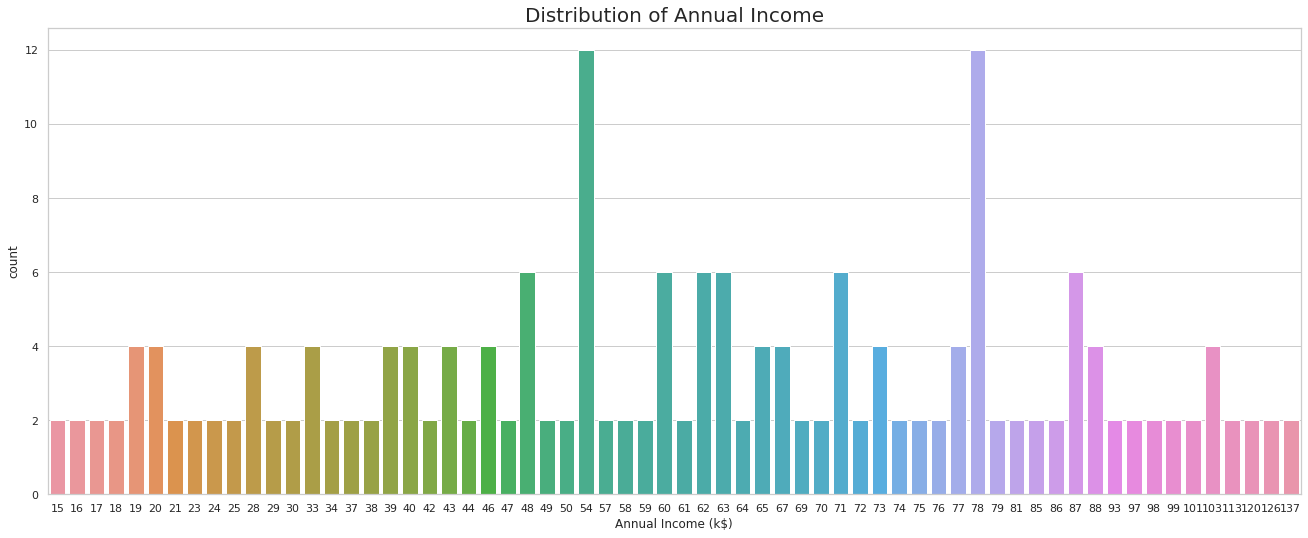

In [15]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

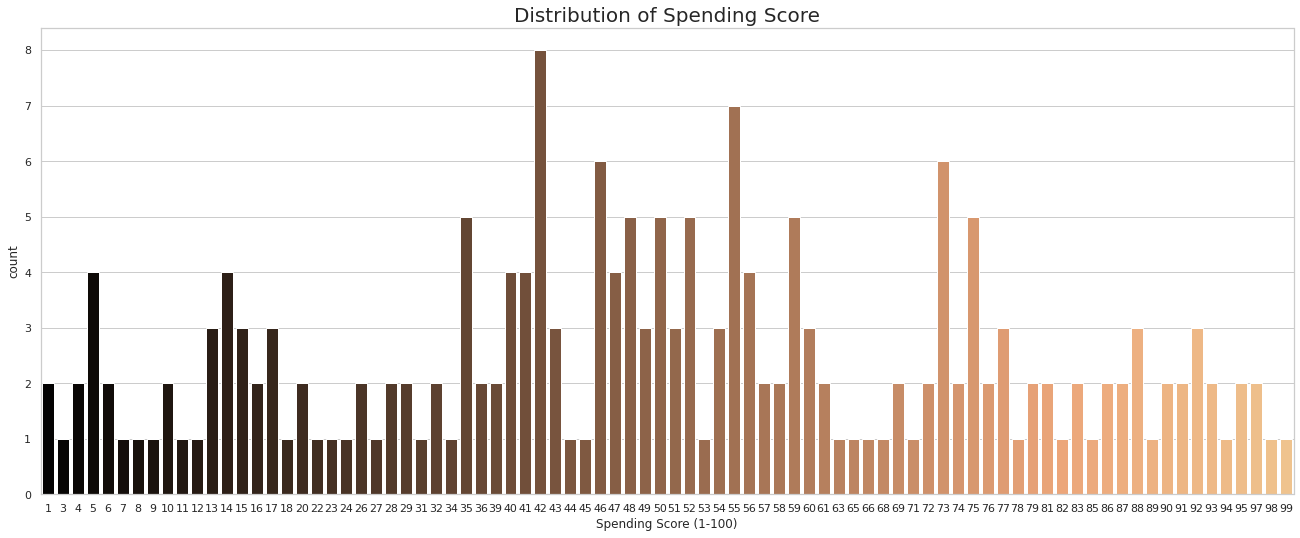

In [16]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Spending Score (1-100)'], palette = 'copper')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

### PairPlot + Heatmap

Most of the Customers have their Spending Score in the range of 35-60

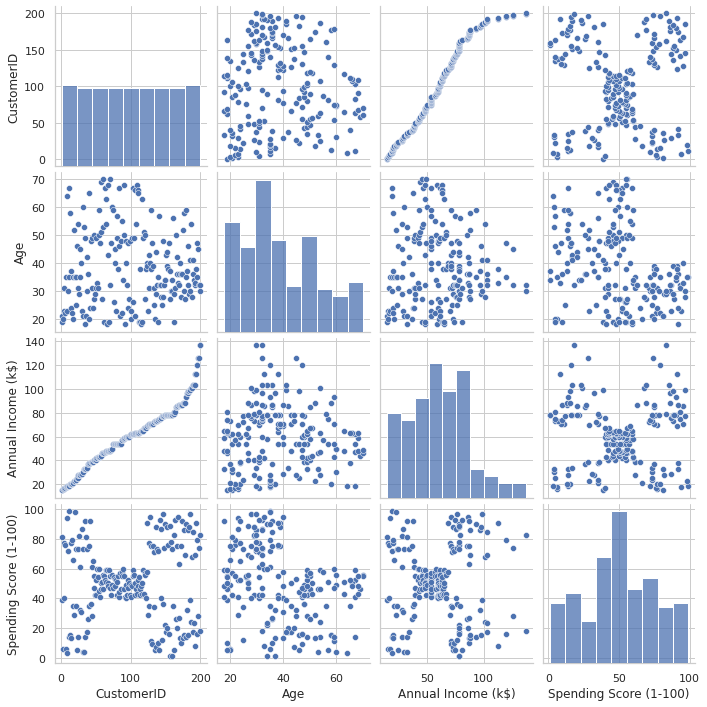

In [17]:
sns.pairplot(data)
plt.show()

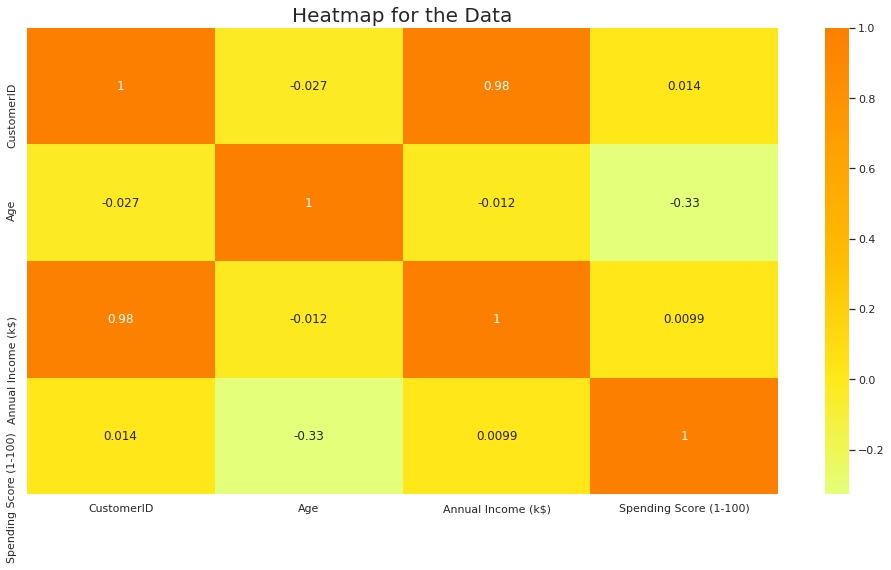

In [18]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

Customer ID have been assigned by increasing Annual Income

In [19]:
data = data.drop('CustomerID', axis=1)

### Studying gender

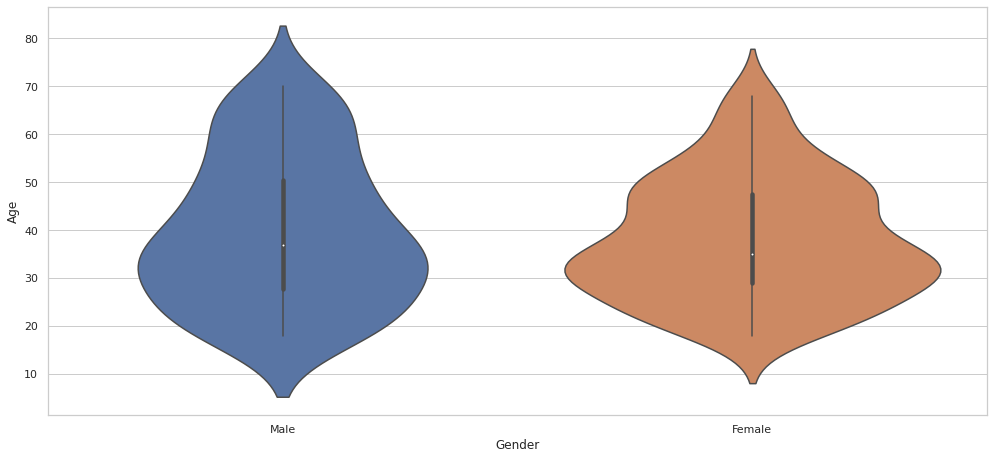

In [20]:
plt.rcParams['figure.figsize'] = (15, 7)

sns.violinplot(data=data, y='Age', x="Gender", orient="v")
plt.show()

Large quantity of womens in their 30s

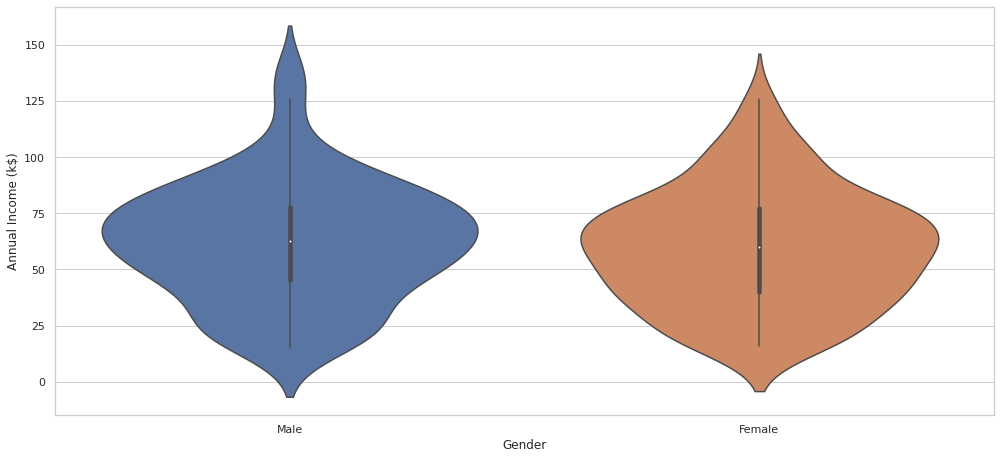

In [21]:
plt.rcParams['figure.figsize'] = (15, 7)

sns.violinplot(data=data, y='Annual Income (k$)', x="Gender")
plt.show()

More higher income males than females

Equal lower incomes in both sex

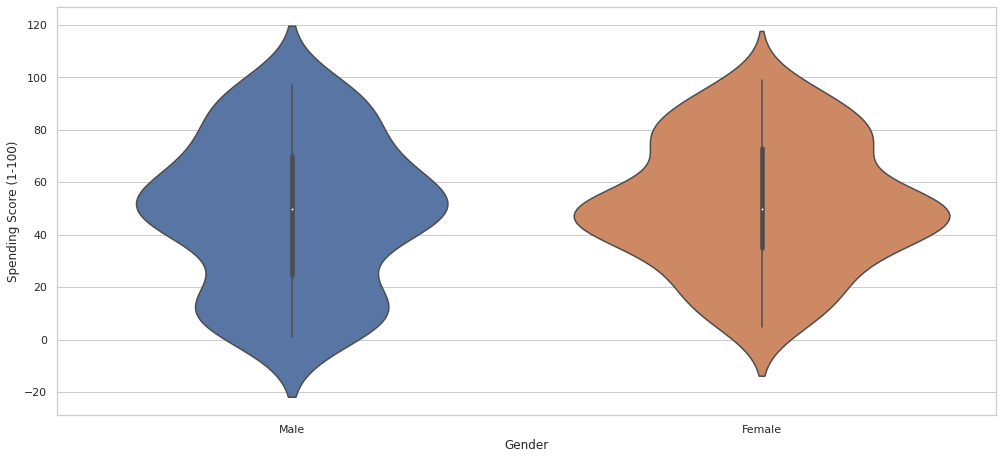

In [22]:
plt.rcParams['figure.figsize'] = (15, 7)

sns.violinplot(data=data, y='Spending Score (1-100)', x="Gender")
plt.show()

The mall attracts a high proportion of median Spending Score customers

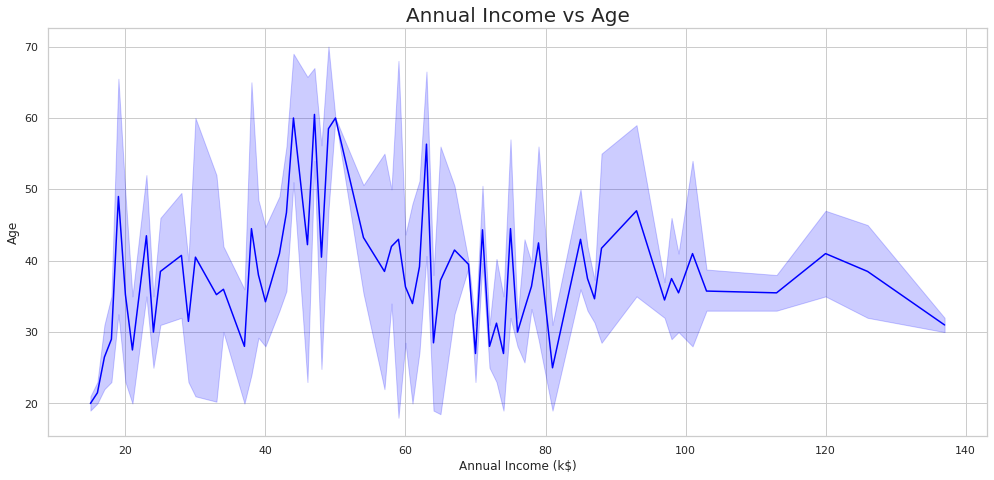

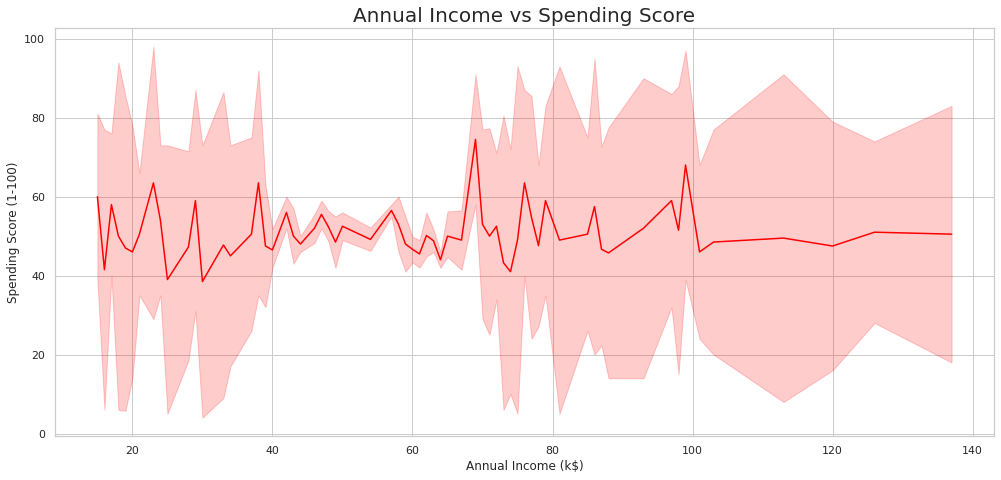

In [23]:
sns.lineplot(data['Annual Income (k$)'], data['Age'], color = 'blue')
plt.title('Annual Income vs Age', fontsize = 20)
plt.show()
sns.lineplot(data['Annual Income (k$)'], data['Spending Score (1-100)'], color = 'red')
plt.title('Annual Income vs Spending Score', fontsize = 20)
plt.show()

# ALgorithms

In [24]:
df = data.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'})

In [26]:
# Let's see our data in a detailed way with pairplot
X = df.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

KeyError: "['CustomerID'] not found in axis"

## Kmeans Algorithm

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

NameError: name 'X' is not defined

## 3D Plot

In [ ]:
x = data[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_


In [ ]:

data['labels'] =  labels
trace1 = go.Scatter3d(
    x= data['Age'],
    y= data['Spending Score (1-100)'],
    z= data['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = data['labels'], 
        size= 10,
        line=dict(
            color= data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)





